In [1]:
import numpy
import networkx as nx
import matplotlib.pyplot as plt
G2=nx.Graph()
G3=nx.Graph()
Gr=nx.Graph()
Gg=nx.Graph()
Gl=nx.Graph()
W=1
FS=2
P=0.1
A=0.5
MXN=40
_dpi=4096

In [2]:
f=open('1.data','r')
s=f.read().split('\n')
f.close()

In [3]:
i=0
while 1:
    try:
        s[i]=s[i].split(' ')
        i+=1
    except IndexError:
        break

In [4]:
d={'Ciri':1}
_d=[0]*MXN
_d[1]='Ciri'
o=[([0]*MXN)for dsfgeasd in range(MXN)]
mp=[([_dpi]*MXN)for dsfgeasd in range(MXN)]
ph=[([_dpi]*MXN)for dsfgeasd in range(MXN)]
o[0][1]='Ciri'
o[1][0]='Ciri'
mp[0][1]='Ciri'
mp[1][0]='Ciri'
i=0
t=2
v=2
while 1:
    if s[i][0][0]=='#':
        i+=1
        v*=2
    try:
        x=d[s[i][0]]
    except IndexError:
        break
    except KeyError:
        d[s[i][0]]=t
        _d[t]=s[i][0]
        x=t
        o[0][t]=s[i][0]
        o[t][0]=s[i][0]
        mp[0][t]=s[i][0]
        mp[t][0]=s[i][0]
        t+=1
    try:
        y=d[s[i][1]]
    except IndexError:
        break
    except KeyError:
        d[s[i][1]]=t
        _d[t]=s[i][1]
        y=t
        o[0][t]=s[i][1]
        o[t][0]=s[i][1]
        mp[0][t]=s[i][1]
        mp[t][0]=s[i][1]
        t+=1
    o[x][y]=v
    o[y][x]=v
    mp[x][y]=1
    mp[y][x]=1
    G3.add_edge(s[i][0],s[i][1],weight=v)
    Gl.add_edge(s[i][0],s[i][1],weight=1)
    if v==2:
        G2.add_edge(s[i][0],s[i][1],weight=v)
        Gg.add_edge(s[i][0],s[i][1],weight=v)
    if v==8:
        G2.add_edge(s[i][0],s[i][1],weight=v)
        Gr.add_edge(s[i][0],s[i][1],weight=v)
    i+=1
n=t-1
print(i,n)

74 39


In [5]:
for i in range(1,n+1):
    mp[i][i]=0
    o[i][i]=16
    for j in range(1,n+1):
        ph[i][j]=j
mp[0][0]=''
o[0][0]=''
for k in range(1,n+1):
    for i in range(1,n+1):
        for j in range(1,n+1):
            nl=mp[i][k]+mp[k][j]
            if mp[i][j]>nl:
                mp[i][j]=nl
                ph[i][j]=ph[i][k]
                mp[j][i]=nl
                ph[j][i]=ph[j][k]
# print(mp)
ls=[0]*MXN
lp=[0]*MXN
cpl=0
cpr=0
cpx=0
for i in range(1,n+1):
    for j in range(1,n+1):
        ls[i]+=mp[i][j]
        if o[i][j]>0:
            lp[i]+=1
        if cpx<mp[i][j]:
            cpx=mp[i][j]
            cpl=i
            cpr=j
i=cpl
while i!=cpr:
    print(_d[i],end=" ")
    i=ph[i][cpr]
print(_d[i])

Vesemir Geralt Philippa Radovid Adda


In [6]:
f=open('o.csv','w')
ff=open('map.csv','w')
for i in range(n+1):
    for j in range(n+1):
        print(o[i][j],end=',',file=f)
        print(mp[i][j],end=',',file=ff)
    print('',file=f)
    print('',file=ff)
f.close()
ff.close()

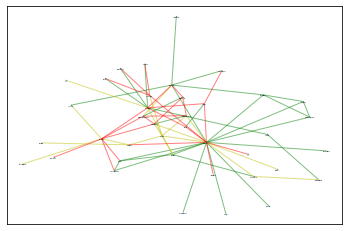

In [7]:
g=G3
fr=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==2]
mi=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==4]
en=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==8]
po=nx.spring_layout(g)
nx.draw_networkx_nodes(g,po,node_size=P)
nx.draw_networkx_edges(g,po,edgelist=fr,width=W,edge_color='g',alpha=A)
nx.draw_networkx_edges(g,po,edgelist=mi,width=W,edge_color='y',alpha=A)
nx.draw_networkx_edges(g,po,edgelist=en,width=W,edge_color='r',alpha=A)
nx.draw_networkx_labels(g,po,font_size=FS)
# plt.axis('off')
# plt.show()
plt.savefig('3.jpg',dpi=_dpi)

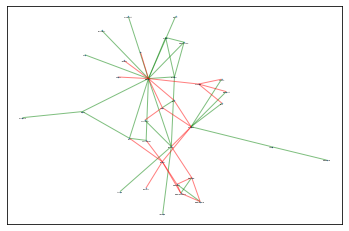

In [8]:
g=G2
fr=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==2]
en=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==8]
po=nx.spring_layout(g)
nx.draw_networkx_nodes(g,po,node_size=P)
nx.draw_networkx_edges(g,po,edgelist=fr,width=W,edge_color='g',alpha=A)
nx.draw_networkx_edges(g,po,edgelist=en,width=W,edge_color='r',alpha=A)
nx.draw_networkx_labels(g,po,font_size=FS)
# plt.axis('off')
# plt.show()
plt.savefig('2.jpg',dpi=_dpi)

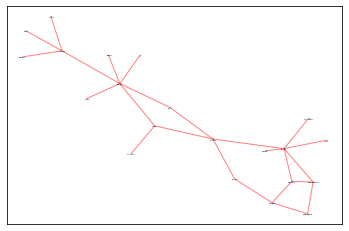

In [9]:
g=Gr
en=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==8]
po=nx.spring_layout(g)
nx.draw_networkx_nodes(g,po,node_size=P)
nx.draw_networkx_edges(g,po,edgelist=en,width=W,edge_color='r',alpha=A)
nx.draw_networkx_labels(g,po,font_size=FS)
# plt.axis('off')
# plt.show()
plt.savefig('red.jpg',dpi=_dpi)

In [10]:
# g=Gg
# fr=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==2]
# po=nx.spring_layout(g)
# nx.draw_networkx_nodes(g,po,node_size=P)
# nx.draw_networkx_edges(g,po,edgelist=fr,width=W,edge_color='g',alpha=A)
# nx.draw_networkx_labels(g,po,font_size=FS)
# # plt.axis('off')
# # plt.show()
# plt.savefig('green.jpg',dpi=_dpi)

In [11]:
def bfs():
    try:
        d[_Name]
    except KeyError:
        print('This guy does not exist.')
        return
    g=nx.Graph();
    t=1
    b=[0]*50
    v=[0]*50
    b[0]=d[_Name]
    v[b[0]]=1
    i=0
    while i<t:
        x=b[i]
        for y in range (1,n+1):
            if v[y]==0 and o[x][y]>0:
                b[t]=y
                v[y]=1
                g.add_edge(_d[x]+'_'+str(i),_d[y]+'_'+str(t),weight=o[x][y])
                t+=1
        i+=1
    fr=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==2]
    mi=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==4]
    en=[(u,v)for(u,v,d)in g.edges(data=True)if d['weight']==8]
    po=nx.spring_layout(g)
    nx.draw_networkx_nodes(g,po,node_size=P)
    nx.draw_networkx_edges(g,po,edgelist=fr,width=W,edge_color='g',alpha=A)
    nx.draw_networkx_edges(g,po,edgelist=mi,width=W,edge_color='y',alpha=A)
    nx.draw_networkx_edges(g,po,edgelist=en,width=W,edge_color='r',alpha=A)
    nx.draw_networkx_labels(g,po,font_size=FS)
#     plt.axis('off')
#     plt.show()
    plt.savefig(_Name+'.jpg',dpi=_dpi)
    return

Geralt 1.4871794871794872
Geralt 23
0.6724137931034483 2.3852728468113074 4.641025641025641


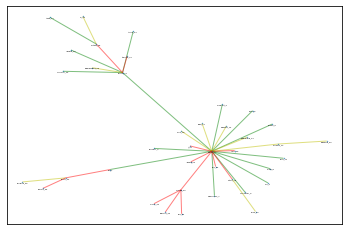

In [13]:
sumls=0
sumlp=0
bct=0
t=_dpi
_Name=''
for i in range(1,n+1):
    ls[i]/=n
    sumls+=ls[i]
    if(ls[i]<t):
        t=ls[i]
        _Name=_d[i]
print(_Name,t)
bct=1/t
t=0
_Name=''
for i in range(1,n+1):
    sumlp+=lp[i]
    if(lp[i]>t):
        t=lp[i]
        _Name=_d[i]
print(_Name,t)
sumlp/=n
sumls/=n
print(bct,sumls,sumlp)
bfs()